<h1 style="color:DodgerBlue;">Compare Purchase behaviour for Purchase Interest</h1>

<strong style="color:Tomato;"> Load Library</strong>    


In [1]:
#import libraries for data handling
import os
import pandas as pd
import numpy as np

#import for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#import for Linear regression
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy.stats as stats
import os
import random

import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

<strong style="color:Tomato;"> Load data</strong>    


In [2]:
import pandas as pd
base1 = pd.read_csv("C:\Vibhaas\Artist of Analytics\ADSM IIM K\CapeStone Project\Data\Basedata_0.csv")
base1.head()


base2 = pd.read_csv("C:\Vibhaas\Artist of Analytics\ADSM IIM K\CapeStone Project\Data\purchase_preference_data_0.csv")
base2.head()

,customer_id,purchase_interest,transaction_date,transaction_month,tran_amount,mcc_code,mcc_description,merchant_name,merchant_country,merchant_city,...,mar_status_S,gender_M,customer_country_India,customer_country_Malaysia,customer_country_Oman,customer_country_Singapore,customer_country_Thailand,customer_country_United Arab Emirates,card_id,tran_id
0,10000020,Restaurants,06-02-2019,2,25.42,5811,Caterers,Restobar - The Senator Hotel,india,kolkata,...,0,1,1,0,0,0,0,0,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,1000002097c17dcc-4db8-4cb2-934d-a490ae51e1c720...
1,10000020,Restaurants,19-02-2019,2,27.08,5811,Caterers,The Street - The Park,india,kolkata,...,0,1,1,0,0,0,0,0,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,1000002097c17dcc-4db8-4cb2-934d-a490ae51e1c720...
2,10000020,Restaurants,20-03-2019,3,31.25,5811,Caterers,The Jungle Terrace,india,bengaluru,...,0,1,1,0,0,0,0,0,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,1000002097c17dcc-4db8-4cb2-934d-a490ae51e1c720...
3,10000020,Restaurants,03-05-2019,5,30.00,5811,Caterers,The Roost - Urban Bistro And Bar,india,delhi,...,0,1,1,0,0,0,0,0,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,1000002097c17dcc-4db8-4cb2-934d-a490ae51e1c720...
4,10000020,Restaurants,19-08-2019,8,27.08,5811,Caterers,KALYAN VEG PLATTER,india,thrissur,...,0,1,1,0,0,0,0,0,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,1000002097c17dcc-4db8-4cb2-934d-a490ae51e1c720...


In [3]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432439 entries, 0 to 432438
Data columns (total 54 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   customer_id                            432439 non-null  int64  
 1   purchase_interest                      432439 non-null  object 
 2   transaction_date                       432439 non-null  object 
 3   transaction_month                      432439 non-null  int64  
 4   tran_amount                            432439 non-null  float64
 5   mcc_code                               432439 non-null  int64  
 6   mcc_description                        432439 non-null  object 
 7   merchant_name                          432439 non-null  object 
 8   merchant_country                       432439 non-null  object 
 9   merchant_city                          432439 non-null  object 
 10  m_state                                432439 non-null  

In [7]:
df_basedata_pp = df_basedata_pp = base2[base2['purchase_interest'].isin(['Restaurants', 'Airlines', 'Retail_Outlet', 'Household'])]



df_basedata_pp_cn = df_basedata_pp.groupby(['customer_id', 'purchase_interest']).sum()[['tran_amount']].reset_index()

# Convert the running list of user ratings into a matrix using the 'pivot table' function
df_summdata_cust_pi_cn = pd.pivot_table(df_basedata_pp_cn, index='customer_id', columns='purchase_interest', aggfunc=np.sum, fill_value=0)

# Reset Index
df_summdata_cust_pi_cn.columns = df_summdata_cust_pi_cn.columns.droplevel(0) #remove tran_amount
df_summdata_cust_pi_cn.columns.name = None               #remove mcc_code
df_summdata_cust_pi_cn = df_summdata_cust_pi_cn.reset_index()                #index to columns
df_summdata_cust_pi_cn.head()

#Add Prefix - add_prefix('cust_mcc_cn_')
df_summdata_cust_pi_cn = df_summdata_cust_pi_cn.add_prefix('cust_pi_cn_')
print("df_summdata_cust_pi_cn with size : ", df_summdata_cust_pi_cn.shape)


df_summdata_cust_pi_cn with size :  (8691, 5)


In [8]:
df_summdata_cust_pi_cn.describe()

,cust_pi_cn_customer_id,cust_pi_cn_Airlines,cust_pi_cn_Household,cust_pi_cn_Restaurants,cust_pi_cn_Retail_Outlet
count,8.691000e+03,8691.000000,8691.000000,8691.000000,8691.000000
mean,1.045484e+07,2798.531815,312.315760,922.537100,805.777259
std,2.878052e+05,9724.858502,1179.658433,2173.103914,2171.397417
min,1.000002e+07,0.000000,0.000000,0.000000,0.000000
25%,1.020842e+07,0.000000,0.000000,1.920000,0.000000
50%,1.041492e+07,0.000000,0.000000,134.590000,0.000000
75%,1.070053e+07,463.000000,84.285000,710.485000,463.280000
max,1.099999e+07,125325.000000,13834.260000,16198.250000,16563.020000


Text(0.5, 1.0, 'ANOVA Distribution')

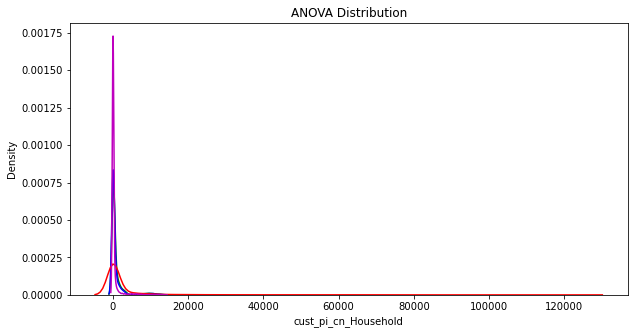

In [9]:

A = df_summdata_cust_pi_cn["cust_pi_cn_Restaurants"]
B = df_summdata_cust_pi_cn["cust_pi_cn_Retail_Outlet"]
C = df_summdata_cust_pi_cn["cust_pi_cn_Airlines"]
D = df_summdata_cust_pi_cn["cust_pi_cn_Household"]


label1 = "Class Restaurant"
label2 = "Class Retail"
label3 = "Class Airline"
label4 = "Class Household"

title = 'ANOVA Distribution'
#-------

# Plot Distribution 
plt.figure(figsize=(10,5))
sns.distplot(A,hist=False, bins=10, color='g', label = label1).set_title(title)
sns.distplot(B,hist=False, bins=10, color='b', label = label2).set_title(title)
sns.distplot(C,hist=False, bins=10, color='r', label = label3).set_title(title)
sns.distplot(D,hist=False, bins=10, color='m', label = label4).set_title(title)


In [11]:
#df_basedata_pp[]
#c_Region

df_basedata_pp_cn = df_basedata_pp.groupby(['customer_id', 'c_Region']).count()[['tran_amount']].reset_index()

# Convert the running list of user ratings into a matrix using the 'pivot table' function
df_summdata_cust_pi_cn = pd.pivot_table(df_basedata_pp_cn, index='customer_id', columns='c_Region', aggfunc=np.sum, fill_value=0)

# Reset Index
df_summdata_cust_pi_cn.columns = df_summdata_cust_pi_cn.columns.droplevel(0) #remove tran_amount
df_summdata_cust_pi_cn.columns.name = None               #remove mcc_code
df_summdata_cust_pi_cn = df_summdata_cust_pi_cn.reset_index()                #index to columns
df_summdata_cust_pi_cn.head()

#Add Prefix - add_prefix('cust_mcc_cn_')
df_summdata_cust_region_cn = df_summdata_cust_pi_cn.add_prefix('cust_region_cn_')
print("df_summdata_cust_pi_cn with size : ", df_summdata_cust_region_cn.shape)


df_summdata_cust_pi_cn with size :  (8691, 5)


In [12]:

df_summdata_cust_region_cn.drop(['cust_region_cn_customer_id'], axis=1, inplace=True)
df_summdata_cust_region_cn.head()


,cust_region_cn_E,cust_region_cn_N,cust_region_cn_S,cust_region_cn_W
0,0,0,22,0
1,0,0,0,69
2,0,0,0,13
3,0,0,0,59
4,89,0,0,0


In [14]:
F, p = stats.f_oneway(df_summdata_cust_region_cn["cust_region_cn_E"],df_summdata_cust_region_cn["cust_region_cn_N"],df_summdata_cust_region_cn["cust_region_cn_S"],df_summdata_cust_region_cn["cust_region_cn_W"])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=609.701, p=0.000


In [15]:
df_summdata_cust_region_cn.describe()

,cust_region_cn_E,cust_region_cn_N,cust_region_cn_S,cust_region_cn_W
count,8691.000000,8691.000000,8691.000000,8691.000000
mean,2.157059,16.455068,8.993326,9.264527
std,11.745090,28.027878,22.221957,22.949990
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,24.000000,0.000000,1.000000
max,175.000000,206.000000,198.000000,207.000000


In [16]:
pi = base2.purchase_interest.unique()
pi

array(['Restaurants', 'Retail_Outlet', 'Household', 'Art', 'Airlines',
       'Lodging', 'Clothing'], dtype=object)

Restaurants


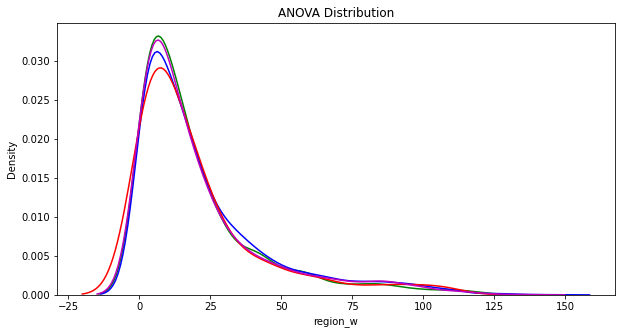

ANOVA stats for  Restaurants
F-Statistic=3.225, p=0.022
We reject null hypothesis. There is significant Difference in purchase pattern in 4 Regions for Restaurants
          
Retail_Outlet


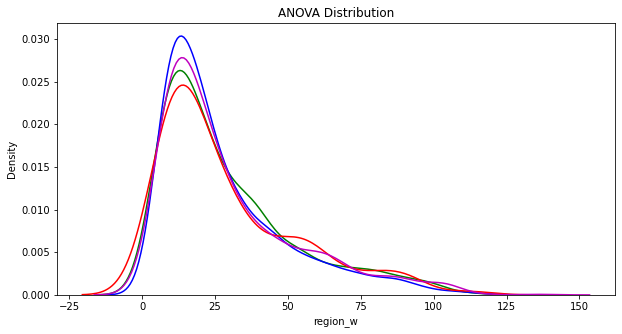

ANOVA stats for  Retail_Outlet
F-Statistic=2.077, p=0.101
We accept null hypothesis. There is NO significant Difference in purchase pattern in 4 Regions for Retail_Outlet
          
Household


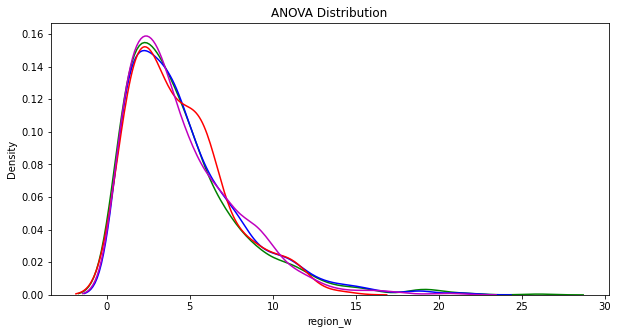

ANOVA stats for  Household
F-Statistic=0.845, p=0.469
We accept null hypothesis. There is NO significant Difference in purchase pattern in 4 Regions for Household
          
Art


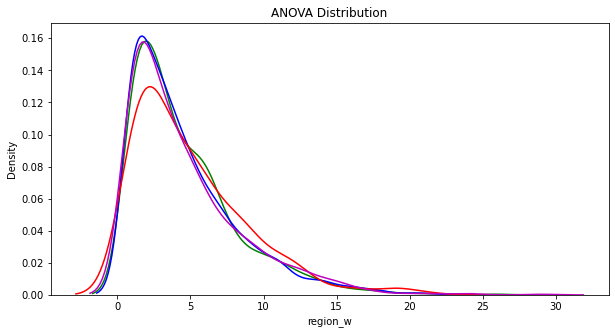

ANOVA stats for  Art
F-Statistic=1.210, p=0.305
We accept null hypothesis. There is NO significant Difference in purchase pattern in 4 Regions for Art
          
Airlines


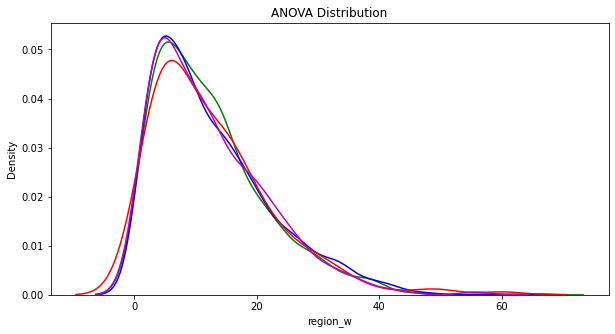

ANOVA stats for  Airlines
F-Statistic=0.327, p=0.806
We accept null hypothesis. There is NO significant Difference in purchase pattern in 4 Regions for Airlines
          
Lodging


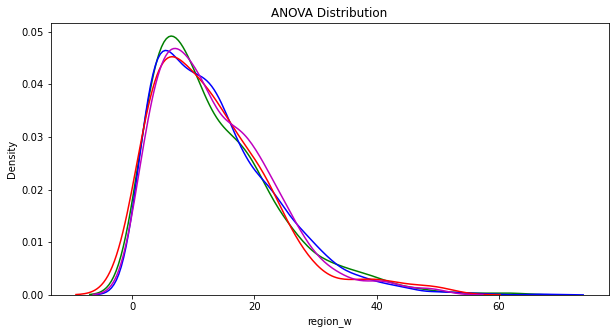

ANOVA stats for  Lodging
F-Statistic=0.251, p=0.860
We accept null hypothesis. There is NO significant Difference in purchase pattern in 4 Regions for Lodging
          
Clothing


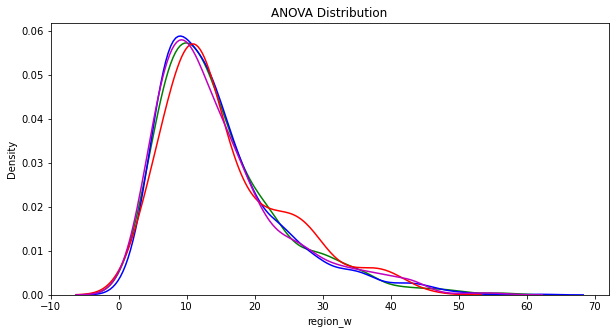

ANOVA stats for  Clothing
F-Statistic=0.554, p=0.645
We accept null hypothesis. There is NO significant Difference in purchase pattern in 4 Regions for Clothing
          
ANOVA Analysis Done


In [13]:
#['Restaurants', 'Retail_Outlet', 'Household', 'Art', 'Airlines','Lodging', 'Clothing']

pi = base2.purchase_interest.unique()

for x in pi:
    df_basedata_pp = df_basedata_pp = base2[base2['purchase_interest'].isin([x])]

    print(x)

    df_basedata_pp_cn = df_basedata_pp.groupby(['customer_id', 'c_Region']).count()[['tran_amount']].reset_index()

    df_basedata_pp_cn.head()


    df_basedata_pp_S = df_basedata_pp_cn[df_basedata_pp_cn['c_Region'].isin(['S'])]
    anova1 = df_basedata_pp_S[['tran_amount']]
    # Rename 
    anova1.rename(columns={"tran_amount": "region_s"}, inplace = True)

    S = anova1['region_s']

    df_basedata_pp_S = df_basedata_pp_cn[df_basedata_pp_cn['c_Region'].isin(['N'])]
    anova1 = df_basedata_pp_S[['tran_amount']]
    # Rename 
    anova1.rename(columns={"tran_amount": "region_n"}, inplace = True)

    N = anova1['region_n']

    df_basedata_pp_S = df_basedata_pp_cn[df_basedata_pp_cn['c_Region'].isin(['E'])]
    anova1 = df_basedata_pp_S[['tran_amount']]
    # Rename 
    anova1.rename(columns={"tran_amount": "region_e"}, inplace = True)

    E = anova1['region_e']

    df_basedata_pp_S = df_basedata_pp_cn[df_basedata_pp_cn['c_Region'].isin(['W'])]
    anova1 = df_basedata_pp_S[['tran_amount']]
    # Rename 
    anova1.rename(columns={"tran_amount": "region_w"}, inplace = True)

    W = anova1['region_w']


    label1 = "Class S"
    label2 = "Class N"
    label3 = "Class E"
    label4 = "Class W"

    title = 'ANOVA Distribution'
    #-------

    # Plot Distribution 
    plt.figure(figsize=(10,5))
    sns.distplot(S,hist=False, bins=10, color='g', label = label1).set_title(title)
    sns.distplot(N,hist=False, bins=10, color='b', label = label2).set_title(title)
    sns.distplot(E,hist=False, bins=10, color='r', label = label3).set_title(title)
    sns.distplot(W,hist=False, bins=10, color='m', label = label4).set_title(title)
    plt.show()

    print('ANOVA stats for ', x)

    F, p = stats.f_oneway(S,N,E,W)
    # Seeing if the overall model is significant
    print('F-Statistic=%.3f, p=%.3f' % (F, p))


    if p<0.05:
        print("We reject null hypothesis. There is significant Difference in purchase pattern in 4 Regions for" , x)
    else:
        print("We accept null hypothesis. There is NO significant Difference in purchase pattern in 4 Regions for" , x)

    print('          ')

print('ANOVA Analysis Done')

In [17]:
F, p = stats.f_oneway(S,N,E,W)
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))
#We see that p-value <0.05. Hence, we can reject the Null Hypothesis – there are no differences among different Regions.

F-Statistic=0.554, p=0.645


In [18]:
F, p = stats.f_oneway(df_summdata_cust_region_cn["cust_region_cn_E"],df_summdata_cust_region_cn["cust_region_cn_N"],df_summdata_cust_region_cn["cust_region_cn_S"],df_summdata_cust_region_cn["cust_region_cn_W"])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=609.701, p=0.000


https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTesting-ANOVA/BS704_HypothesisTesting-Anova_print.html